# Question 2 ~ 8

## Data preprocessing

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df_train = pd.read_csv('train.csv', header=None)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,0.0,-0.36,-0.91,-0.99,-0.57,-1.38,-1.54,-1.64,1.29,0.65,...,1.15,-0.05,-0.09,0.02,1.75,1.58,0.12,0.30,2.44,-1.26
1,1.0,-1.40,-1.90,0.09,0.29,-0.30,-1.30,1.13,-2.38,-1.16,...,0.48,0.24,-0.16,-0.48,-0.02,-0.35,-0.27,-0.20,-0.92,-0.46
2,1.0,-0.43,1.45,-0.68,-1.58,0.32,-0.14,0.23,-1.01,-0.39,...,-0.94,0.11,-1.30,-0.24,0.74,0.88,1.37,0.12,0.01,-0.56
3,1.0,-0.76,0.30,-0.57,-0.33,-1.50,1.84,1.37,0.23,0.66,...,-0.42,0.06,-1.05,0.35,-0.24,-0.69,1.31,-0.18,-1.54,-1.70
4,0.0,-0.76,1.36,0.00,-1.44,-1.27,-0.76,-1.42,-0.58,0.11,...,-0.44,1.45,-1.18,-1.13,-0.14,0.04,0.33,1.20,-0.81,-1.16


In [3]:
df_test = pd.read_csv('test.csv', header=None)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,1.0,-0.97,-0.69,-0.96,1.05,0.02,0.64,-0.91,-1.33,-1.21,...,-1.27,0.89,1.32,2.98,1.68,0.29,-1.88,-0.60,-0.68,0.20
1,0.0,-0.82,-0.17,-0.36,-1.99,-1.54,-0.31,-1.75,0.14,-0.54,...,1.14,2.49,1.94,-0.94,-0.70,1.10,-1.44,0.46,0.98,2.90
2,0.0,-1.68,0.13,-0.42,1.41,0.89,-0.42,1.33,-0.08,-0.14,...,-0.99,-0.45,0.21,0.37,1.16,-0.56,-0.57,-1.42,-0.38,0.33
3,0.0,-1.28,1.21,0.65,1.90,-1.21,-0.38,-0.79,2.18,-0.99,...,-0.83,0.26,-0.22,-0.57,-0.34,-1.35,-0.79,-0.62,-0.54,0.51
4,1.0,-1.18,0.41,1.05,0.16,-0.72,0.91,0.33,-0.23,0.77,...,-0.84,-0.70,-0.88,-1.53,0.81,1.14,1.21,-0.15,0.26,1.09


In [4]:
print(df_train.shape)
print(df_test.shape)

(8500, 201)
(1500, 201)


In [5]:
# the first 4000 samples in the "train.csv" file as the training set 
# and the remaining samples as validation set. 
# All the samples in the "test.csv" file will be used as test samples.
data_train = df_train.iloc[:4000, 1:]
data_val = df_train.iloc[4000:, 1:]
data_test = df_test.iloc[:, 1:]

# take the first column as the label
label_train = df_train.iloc[:4000, 0]
label_val = df_train.iloc[4000:, 0]
label_test = df_test.iloc[:, 0]

label_train[label_train == 0] = -1
label_val[label_val == 0] = -1
label_test[label_test == 0] = -1

print(data_train.shape)
print(data_val.shape)
print(data_test.shape)
print(label_train.shape)
print(label_val.shape)
print(label_test.shape)

(4000, 200)
(4500, 200)
(1500, 200)
(4000,)
(4500,)
(1500,)


## Question 2


$$\min_{w,b} \frac{1}{2} w^T w + \frac{C}{N} \sum_{i=1}^N \xi_i$$
$$\text{s.t.}\quad y_i(w^T x_i + b) >= 1 - \xi_i, i=1,2,...,N$$
$$\xi_i >= 0, i=1,2,...,N$$

In [6]:
# implement the training and testing algorithms of soft-margin Linear Support Vector Machine from its primal form
# the primal form of the soft-margin SVM is:
# min_{w,b} 1/2 * w^T w + C/N * sum_{i=1}^N xi_i
# s.t. y_i(w^T x_i + b) >= 1 - xi_i, i=1,2,...,N
#      xi_i >= 0, i=1,2,...,N

import numpy as np
import cvxpy as cp

def svm_train_primal(data_train, label_train, regularisation_para_C):
    N, D = data_train.shape
    w = cp.Variable(D)
    b = cp.Variable()
    xi = cp.Variable(N)
    objective = cp.Minimize(cp.square(cp.norm(w)) / 2 + regularisation_para_C / N * cp.sum(xi))
    constraints = [cp.multiply(label_train, data_train @ w + b) >= 1 - xi, xi >= 0]
    prob = cp.Problem(objective, constraints)
    prob.solve()
    return w.value, b.value

def svm_predict_primal(data_test, lable_test, svm_model):
    w, b = svm_model
    # retun accuracy on the test set
    return np.mean(np.sign(data_test @ w + b) == lable_test)

In [7]:
# C = 100
svm_model = svm_train_primal(data_train.values, label_train.values, 100)
acc = svm_predict_primal(data_test.values, label_test.values, svm_model)
print('The accuracy on the test set is', acc)

The accuracy on the test set is 0.968


In [8]:
# print b and sum of w
w, b = svm_model
print('b =', b)
print('sum of w =', np.sum(w))

b = 1.7798137266344365
sum of w = -0.14521544474819548


## Question 3


$$ \max_{\alpha}  \sum_{i=1}^{N}\alpha_{i} - \frac{1}{2}\sum_{i=1}^{N}\sum_{j=1}^{N}\alpha_{i}\alpha_{j}y_{i}y_{j}(\mathbf{x}_i \cdot \mathbf{x}_j)\\$$

$$\text{s.t.} \quad
0 \leq \alpha_{i} \leq \frac{C}{N} , i=1,2,...,N$$

$$\quad \sum_{i=1}^{N}\alpha_{i}y_{i} = 0\\$$

In [9]:
# Implement the training and testing algorithms of soft-margin Linear Support Vector Machine from its dual form
# The dual form of the soft-margin SVM is:
# \max_{\alpha}  \sum_{i=1}^{N}\alpha_{i} - \frac{1}{2}\sum_{i=1}^{N}\sum_{j=1}^{N}\alpha_{i}\alpha_{j}y_{i}y_{j}(\mathbf{x}_i \cdot \mathbf{x}_j)\\
# \text{s.t.} \quad 0 \leq \alpha_{i} \leq \frac{C}{N} , i=1,2,...,N
# \quad \sum_{i=1}^{N}\alpha_{i}y_{i} = 0\\$$
import numpy as np

def svm_train_dual(data_train, label_train, regularisation_para_C):
    N, D = data_train.shape
    alpha = cp.Variable(N)
    
    # The objective function for the dual SVM problem
    objective = cp.Maximize(cp.sum(alpha) - 0.5 * cp.sum_squares(data_train.T @ cp.multiply(alpha, label_train)))
    
    # Constraints for the dual SVM problem
    constraints = [alpha >= 0, alpha <= regularisation_para_C / N, cp.sum(cp.multiply(alpha, label_train)) == 0]
    
    # Define the problem and solve it
    prob = cp.Problem(objective, constraints)
    prob.solve(solver=cp.ECOS)
    
    return alpha.value

# C = 100
alpha = svm_train_dual(data_train.values, label_train.values, 100)
print('Alpha =', alpha)
print('Sum of alpha =', np.sum(alpha))


Alpha = [ 2.50000000e-02 -6.91631310e-13 -9.06563487e-13 ... -6.35096121e-13
 -7.30265872e-13 -7.70674234e-13]
Sum of alpha = 7.28163240568506


## Question 4  
Write code to obtain the primal problem solution $w^*$, $b^*$ from its dual solution $\alpha^*$. Please copy the code snippet for the implementation  (You can also do this by attaching the screenshot of your code.).

$$w^* = \sum_{i=1}^{N} \alpha_i^* y_i x_i$$
$$b^* = y_k - \sum_{i=1}^{N} \alpha_i^* y_i (x_i \cdot x_k)$$

In [10]:
# obtain the primal problem solution w*, b* from its dual solution ⍺*
# w* = \sum_{i=1}^{N} \alpha_i* y_i x_i
# b* = y_k - \sum_{i=1}^{N} \alpha_i* y_i (x_i \cdot x_k)
def svm_predict_dual(data_train, label_train, alpha, regularisation_para_C):
    N, D = data_train.shape
    w = np.sum(np.tile(alpha * label_train, (D, 1)).T * data_train, axis=0)
    S = (alpha > 1e-5)
    b = np.mean(label_train[S] - np.dot(data_train[S], w))
    return w, b

w, b = svm_predict_dual(data_train.values, label_train.values, alpha, 100)
print('b* =', b)
print('sum of w* =', np.sum(w))
print('The accuracy on the test set is', np.mean(np.sign(data_test @ w + b) == label_test))

b* = 1.738943070840537
sum of w* = -0.14521570328648314
The accuracy on the test set is 0.9686666666666667


## Question 5  
Write code to find the support vectors from the primal problem solutions. Please attach the code snippet for the implementation. 

In [11]:
# fina the support vectors from the primal problem solution
# s.t. y_i(w^T x_i + b) >= 1 - xi_i, i=1,2,...,N
#      xi_i >= 0, i=1,2,...,N
def find_primal_support_vectors(data_train, label_train, w, b):
    support_vectors = []
    for i in range(len(label_train)):
        if label_train[i] * (np.dot(w, data_train[i]) + b) <= 1 +1e-6:
            support_vectors.append(data_train[i])
    return support_vectors

support_vectors = find_primal_support_vectors(data_train.values, label_train.values, w, b)
print('The number of support vectors is', len(support_vectors))
print('support_vectors =', support_vectors)

The number of support vectors is 305
support_vectors = [array([-0.36, -0.91, -0.99, -0.57, -1.38, -1.54, -1.64,  1.29,  0.65,
       -0.75,  1.11, -0.04,  1.86,  0.76, -0.67,  0.75,  0.07,  0.31,
        1.23, -0.7 , -0.31, -1.48,  0.11, -1.18,  0.78,  0.48,  0.85,
        2.11, -1.45,  0.74, -0.54,  1.31,  0.64, -1.42,  1.22, -1.35,
        0.4 , -0.72, -0.79,  0.8 ,  0.32, -0.76,  0.22,  2.59, -0.64,
        1.27,  0.66,  1.8 ,  0.77,  1.13, -1.69, -1.31,  1.66, -0.26,
       -0.17, -0.41, -0.8 ,  1.24, -1.51, -1.45, -1.07, -1.38, -0.92,
       -1.26, -2.02,  0.58, -0.58, -1.06, -0.05,  0.29, -1.72, -0.26,
       -1.67, -0.07,  0.81,  0.01, -0.22,  1.72,  0.43,  0.92, -0.68,
       -0.98, -1.12, -0.81, -0.79,  1.72, -1.33, -1.08, -1.37, -1.75,
       -0.9 , -0.76, -1.33,  0.37,  0.25,  0.24,  0.33, -0.72, -1.05,
       -0.47, -0.44, -0.89,  0.01, -1.29, -1.79, -0.39, -1.03,  0.29,
        1.2 ,  0.62, -0.19, -1.3 , -0.29,  2.5 ,  2.01,  0.75, -0.53,
        1.61, -1.62, -0.33, -0.93,

## Question 6  
Write code to find the support vectors from the dual problem solutions. Please copy the code snippet for the implementation  

In [12]:
# find the support vectors from the dual problem solutions
# the support vectors are the samples that satisfy the following condition:
# 0 < alpha_i < C/N
def find_dual_support_vectors(alpha, regularisation_para_C):
    return (alpha > 1e-6) & (alpha < regularisation_para_C / len(alpha))

support_vectors = find_dual_support_vectors(alpha, 100)
print('The number of support vectors is', np.sum(support_vectors))
print('support_vectors =', data_train.values[support_vectors])

The number of support vectors is 336
support_vectors = [[ 1.05 -1.79  0.9  ...  0.39  0.6  -1.66]
 [ 1.01 -1.13  1.49 ...  0.23 -0.3  -0.01]
 [ 0.41 -0.19  0.88 ... -1.56  0.48 -0.23]
 ...
 [ 2.16 -0.78 -0.78 ... -0.38  1.1   0.39]
 [ 0.36 -0.19 -1.06 ... -0.83 -0.2   0.12]
 [-0.73 -1.19 -0.24 ...  1.46 -1.36  1.21]]


## Question 7
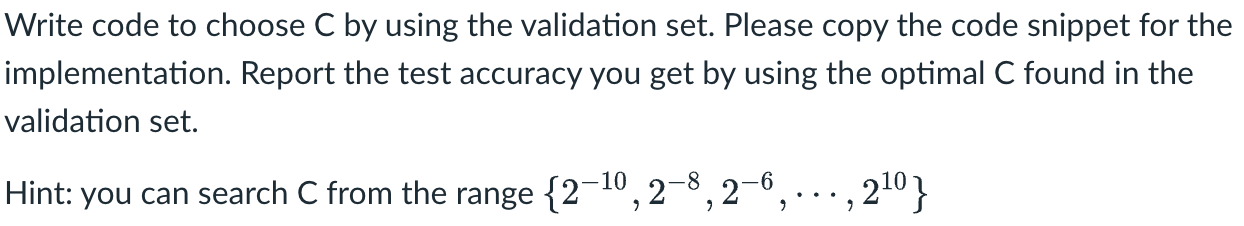

In [13]:
# choose C by using the validation set
C_range = [2**i for i in range(-10, 11, 2)]
accuracy = []
for C in C_range:
    svm_model = svm_train_primal(data_train.values, label_train.values, C)
    acc = svm_predict_primal(data_val.values, label_val.values, svm_model)
    accuracy.append(acc)
    print('C =', C, 'accuracy =', acc)

# the best accuracy with the best C
optimal_C = C_range[np.argmax(accuracy)]
print('The optimal C is', optimal_C)
print('The best accuracy on Validation set is', np.max(accuracy))
test_acc = svm_predict_primal(data_test.values, label_test.values, svm_train_primal(data_train.values, label_train.values, optimal_C))
print('The accuracy on the test set is', test_acc)

C = 0.0009765625 accuracy = 0.4908888888888889
C = 0.00390625 accuracy = 0.4908888888888889
C = 0.015625 accuracy = 0.4908888888888889
C = 0.0625 accuracy = 0.9244444444444444
C = 0.25 accuracy = 0.9622222222222222
C = 1 accuracy = 0.9717777777777777
C = 4 accuracy = 0.9748888888888889
C = 16 accuracy = 0.974
C = 64 accuracy = 0.9713333333333334
C = 256 accuracy = 0.966
C = 1024 accuracy = 0.9626666666666667
The optimal C is 4
The best accuracy on Validation set is 0.9748888888888889
The accuracy on the test set is 0.9746666666666667


## Question 8  
Please study one of the following packages and perform classification with linear SVM (with optimal C searched in the validation set) on the assignment dataset

1. Libsvm

https://www.csie.ntu.edu.tw/~cjlin/libsvm/Links 

2. Scikit-learn SVM

https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVCLinks 

Please copy your code snippet and report your test accuracy.

In [16]:
# Use LinearSVC from sklearn to classify the data
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

accuracy = []
for C in C_range:
    model = LinearSVC(C=C/data_train.shape[0], max_iter=10000)
    model.fit(data_train, label_train)
    pred = model.predict(data_val)
    acc = accuracy_score(label_val, pred)
    accuracy.append(acc)
    print('C =', C, 'accuracy =', acc)

optimal_C = C_range[np.argmax(accuracy)]
print('The optimal C on Validation set is', optimal_C)
model = LinearSVC(C=optimal_C/data_train.shape[0], max_iter=10000)
model.fit(data_train, label_train)
pred = model.predict(data_test)
acc = accuracy_score(label_test, pred)
print('The accuracy on the test set is', acc)

C = 0.0009765625 accuracy = 0.8766666666666667
C = 0.00390625 accuracy = 0.8948888888888888
C = 0.015625 accuracy = 0.9288888888888889
C = 0.0625 accuracy = 0.9533333333333334
C = 0.25 accuracy = 0.9595555555555556
C = 1 accuracy = 0.9626666666666667
C = 4 accuracy = 0.9646666666666667
C = 16 accuracy = 0.9666666666666667
C = 64 accuracy = 0.966
C = 256 accuracy = 0.9653333333333334
C = 1024 accuracy = 0.9648888888888889
The optimal C on Validation set is 16
The accuracy on the test set is 0.968
